In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


<AxesSubplot:xlabel='x', ylabel='y'>

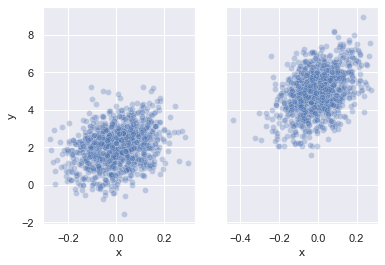

In [99]:
x1 = np.random.normal(0, 0.1, 1000)
x2 = np.random.normal(0, 0.1, 1000)

y1 = x1 * 3 + 2 + np.random.normal(0, 1, 1000) 
y2 = x2 * 4 + 5 + np.random.normal(0, 1, 1000)

d1 = {'x': x1, 'y': y1,'model':['a']*1000}
d2 = {'x': x2, 'y': y2,'model':['b']*1000}
df = pd.DataFrame(data=d1)
df = df.append(pd.DataFrame(data=d2))

fig, ax =plt.subplots(1,2, sharey=True)
sns.scatterplot(data=df[df.model == 'a'],x='x', y='y', alpha=0.3,ax=ax[0])
sns.scatterplot(data=df[df.model == 'b'],x='x', y='y', alpha=0.3,ax=ax[1])

<AxesSubplot:xlabel='x', ylabel='y'>

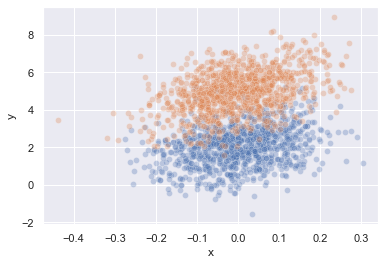

In [100]:
sns.scatterplot(data=df[df.model == 'a'],x='x', y='y', alpha=0.3)
sns.scatterplot(data=df[df.model == 'b'],x='x', y='y', alpha=0.3)


<AxesSubplot:xlabel='x', ylabel='Density'>

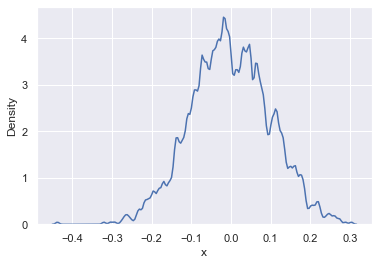

In [101]:
sns.kdeplot(data=df.x,bw_adjust=.2)

In [104]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(df[['x']])

mus = gmm.means_
sigmas = gmm.covariances_

print(sigmas)

#Fit the GMM with random data from the correspondent gaussians
gaus_samples_1 = np.random.normal(mus[0][0], sigmas[0][0][0], 1000).reshape(1000,1)
gaus_samples_2 = np.random.normal(mus[1][0], sigmas[1][0][0], 1000).reshape(1000,1)
fit_samples = np.concatenate((gaus_samples_1, gaus_samples_2))
y = gmm.predict(fit_samples)


[[[0.00619214]]

 [[0.00590647]]]


<AxesSubplot:ylabel='Density'>

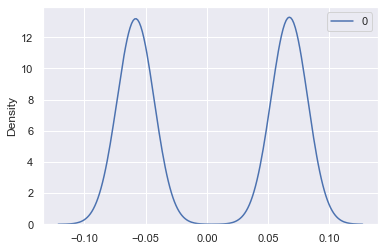

In [105]:

# sns.scatterplot(x=fit_samples, y=y, alpha=0.3)
sns.kdeplot(data=fit_samples)
